<a href="https://colab.research.google.com/github/bfortuno/Surgical-Phase-Recognition/blob/main/docs/tutorial_notebooks/tutorial6/misaw_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 📦 MISAW Dataset Preprocessing

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/bfortuno/Surgical-Phase-Recognition/blob/main/docs/tutorial_notebooks/tutorial3/pytorch_intro.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bfortuno/Surgical-Phase-Recognition/blob/main/docs/tutorial_notebooks/tutorial4/misaw_data_processing.ipynb)    
**Author:** Benjamin I. Fortuno

This notebook is intended to preprocess data from the MISAW dataset, commonly used for computer vision and machine learning tasks. It covers:

- Downloading and extracting the dataset
- Exploring the data structure
- Parsing image and label files

### 🧰 Importing Required Libraries
This section loads essential Python libraries like `os`, `cv2`, `glob`, and `pandas` which are needed for handling files, images, and data manipulation.

In [1]:
import os
import cv2
import os
import glob
import pandas as pd

### 📥 Downloading the Dataset
Here we download the MISAW dataset in `.zip` format from a Dropbox link. This dataset contains videos and annotations for surgical workflow analysis.

In [2]:
!wget -O MISAW.zip https://www.dropbox.com/scl/fi/psmlokrc5ms958ggqyv3u/MISAW.zip?rlkey=v91dz437npon5zz10olrbcqcd&st=54qvf31m&dl=0

--2025-04-17 14:03:10--  https://www.dropbox.com/scl/fi/psmlokrc5ms958ggqyv3u/MISAW.zip?rlkey=v91dz437npon5zz10olrbcqcd
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc86d46467e6b08006340a0c9685.dl.dropboxusercontent.com/cd/0/inline/Cn-EE4o2NysZhYswQNNhqZF23NCkg6aBfX2m7SvWlnDTKmerrrcT_15PETnk9A5NdUumi2u2rYrS1qTNQ0857HP2-_nwATU5MsVJaALzOYqeVbrH2OLQ2KDimSlR5nX86HDB7bmC7Cjn5LI5EjwBiJhS/file# [following]
--2025-04-17 14:03:11--  https://uc86d46467e6b08006340a0c9685.dl.dropboxusercontent.com/cd/0/inline/Cn-EE4o2NysZhYswQNNhqZF23NCkg6aBfX2m7SvWlnDTKmerrrcT_15PETnk9A5NdUumi2u2rYrS1qTNQ0857HP2-_nwATU5MsVJaALzOYqeVbrH2OLQ2KDimSlR5nX86HDB7bmC7Cjn5LI5EjwBiJhS/file
Resolving uc86d46467e6b08006340a0c9685.dl.dropboxusercontent.com (uc86d46467e6b08006340a0c9685.dl.dropboxusercontent.com)... 162.125.81.15, 2620:

### 📦 Extracting the Dataset
This cell unzips the downloaded file to access the raw data.

In [3]:
!unzip -qq MISAW.zip

## 🎞️ Frame Extraction from Videos
This section reads the videos and extracts every N-th frame (controlled by `resample_rate`).
Each video gets its own subdirectory of frames, organized as:
```
MISAW/
  └── train/
        └── Frames/
              └── <video_id>/frame_0000.jpg
```
These images will be later paired with annotations.

In [4]:
import os
import cv2  # OpenCV is used for handling video files and frame extraction

# ----------------------------------------
# 1. Configuration
# ----------------------------------------

# Choose how often to save a frame (e.g., every 120th frame)
# A higher number results in fewer frames being saved. Start high for fast testing.
resample_rate = 120

# Path to the folder containing input videos
video_folder = 'MISAW/train/Video'

# Path where extracted frames will be saved
frames_folder = 'MISAW/train/Frames'

# Create the frames folder if it doesn't exist
os.makedirs(frames_folder, exist_ok=True)


# ----------------------------------------
# 2. Process each video file in the folder
# ----------------------------------------

for video_file in os.listdir(video_folder):
    # Check for supported video formats
    if video_file.endswith(('.mp4', '.avi', '.mov')):
        video_path = os.path.join(video_folder, video_file)  # Full path to video file
        video_name = os.path.splitext(video_file)[0]         # Extract video name without extension

        # Create a subfolder for the frames of this video
        video_frames_path = os.path.join(frames_folder, video_name)
        os.makedirs(video_frames_path, exist_ok=True)

        # Open the video file
        cap = cv2.VideoCapture(video_path)

        # Counters to keep track of frames read and saved
        frame_count = 0      # Total number of frames read
        saved_count = 0      # Number of frames saved

        # ----------------------------------------
        # 3. Read frames one-by-one
        # ----------------------------------------

        while True:
            success, frame = cap.read()  # Read one frame
            if not success:
                break  # End of video

            # Save every N-th frame (based on resample_rate)
            if frame_count % resample_rate == 0:
                # Save frame with a 4-digit padded name (e.g., frame_0001.jpg)
                # `:04d` formats the integer with 4 digits, padded with zeros
                frame_name = f"frame_{saved_count:04d}.jpg"

                # Full path to save the frame
                frame_path = os.path.join(video_frames_path, frame_name)

                # Save the frame as an image file
                cv2.imwrite(frame_path, frame)

                # Increment saved frame counter
                saved_count += 1

            # Increment total frame counter
            frame_count += 1

        # Release the video capture object
        cap.release()

        # Print a summary for this video
        print(f"Saved {saved_count} frames from {video_file}")

# ----------------------------------------
# 4. Final message
# ----------------------------------------

print("Done!")


Saved 37 frames from 3_1.mp4
Saved 47 frames from 1_2.mp4
Saved 83 frames from 1_4.mp4
Saved 32 frames from 6_1.mp4
Saved 49 frames from 3_3.mp4
Saved 57 frames from 1_3.mp4
Saved 61 frames from 6_2.mp4
Saved 36 frames from 6_4.mp4
Saved 79 frames from 2_1.mp4
Saved 63 frames from 1_1.mp4
Saved 50 frames from 2_6.mp4
Saved 108 frames from 2_5.mp4
Saved 123 frames from 2_3.mp4
Saved 63 frames from 2_4.mp4
Saved 51 frames from 6_3.mp4
Saved 40 frames from 3_2.mp4
Saved 100 frames from 2_2.mp4
Done!


### 💡 Explanation: f-strings and formatting

#### **What is an f-string?**
An **f-string** allows inline expressions in strings:
```python
name = "Benjamin"
print(f"Hello, {name}!")  # Outputs: Hello, Benjamin!
```

#### **Formatting numbers: `:04d`**
When saving frame names, we want them **zero-padded to 4 digits** so they're sorted correctly:
```python
frame_num = 7
print(f"frame_{frame_num:04d}.jpg")  # Outputs: frame_0007.jpg
```

- `0` → pad with zeros  
- `4` → total length of 4 digits  
- `d` → it's a decimal (integer)  

This ensures your filenames look like: `frame_0000.jpg`, `frame_0001.jpg`, ..., `frame_0123.jpg`.

## 🧾 Parsing Annotations and Building Frame-Label Pairs
Here we parse the `.txt` annotation files (one per video) to extract surgical phases, then pair each extracted frame with a corresponding label.
We also map textual phase labels to numeric IDs, which is important for training machine learning models.

In [5]:
# Folder where the annotation .txt files are stored (one per video)
annotation_folder = 'MISAW/train/Procedural decription'

# Folder where extracted frames from videos are stored (in subfolders per video)
frames_folder = 'MISAW/train/Frames'

# This is the same rate you used to extract frames from videos (e.g., every 120th frame)
# It must match or your labels won't align with the frames!
resample_rate = 120


# --- Collect all unique phases first ---

# We'll store all unique phase labels (like "Idle", "Suturing", etc.) in this set
all_phases = set()

# Find all annotation files in the folder (e.g., 1_1_annotation.txt, 1_2_annotation.txt, etc.)
annotation_files = sorted(glob.glob(os.path.join(annotation_folder, '*_annotation.txt')))

# Loop through each annotation file and collect unique phase names
for anno_file in annotation_files:
    df = pd.read_csv(anno_file, sep='\t')  # Load the .txt file into a DataFrame
    all_phases.update(df['Phase'].unique())  # Add unique phases to the set

# Create a dictionary to map each phase string to a unique integer ID
# Useful for training machine learning models
phase_to_id = {name: i for i, name in enumerate(sorted(all_phases))}

# Create the inverse mapping (ID to phase name) for visualization later
id_to_phase = {i: name for name, i in phase_to_id.items()}


# --- Build (frame_path, label) pairs ---

# This list will hold tuples like: ("path/to/frame.jpg", 2) → (frame, label_id)
all_data = []

# Go through each annotation file (one per video)
for anno_file in annotation_files:
    # Extract the video ID from the filename (e.g., "1_1_annotation.txt" → "1_1")
    video_id = os.path.basename(anno_file).replace('_annotation.txt', '')

    # Construct the path to the corresponding frame folder
    frame_dir = os.path.join(frames_folder, video_id)

    # Read the annotation file into a DataFrame
    df = pd.read_csv(anno_file, sep='\t')

    # Get the full list of phases (one per original video frame)
    phases = df['Phase'].tolist()

    # Resample: only keep every N-th label (e.g., every 120th label)
    sampled_phases = phases[::resample_rate]

    # Convert phase strings to numeric labels using our earlier mapping
    sampled_ids = [phase_to_id[p] for p in sampled_phases]

    # Get the list of frame image paths, sorted so they match the order of labels
    frame_paths = sorted(glob.glob(os.path.join(frame_dir, '*.jpg')))

    # Sanity check: if the number of frames doesn’t match the number of labels, skip this video
    if len(frame_paths) != len(sampled_ids):
        print(f"⚠️ Mismatch for {video_id}: {len(frame_paths)} frames vs {len(sampled_ids)} labels")
        continue

    # Add all (frame_path, label_id) pairs to our global list
    all_data.extend(zip(frame_paths, sampled_ids))


# Final print to confirm total number of samples loaded
print(f"✅ Total samples: {len(all_data)}")


✅ Total samples: 1079


### Visualize images and phases

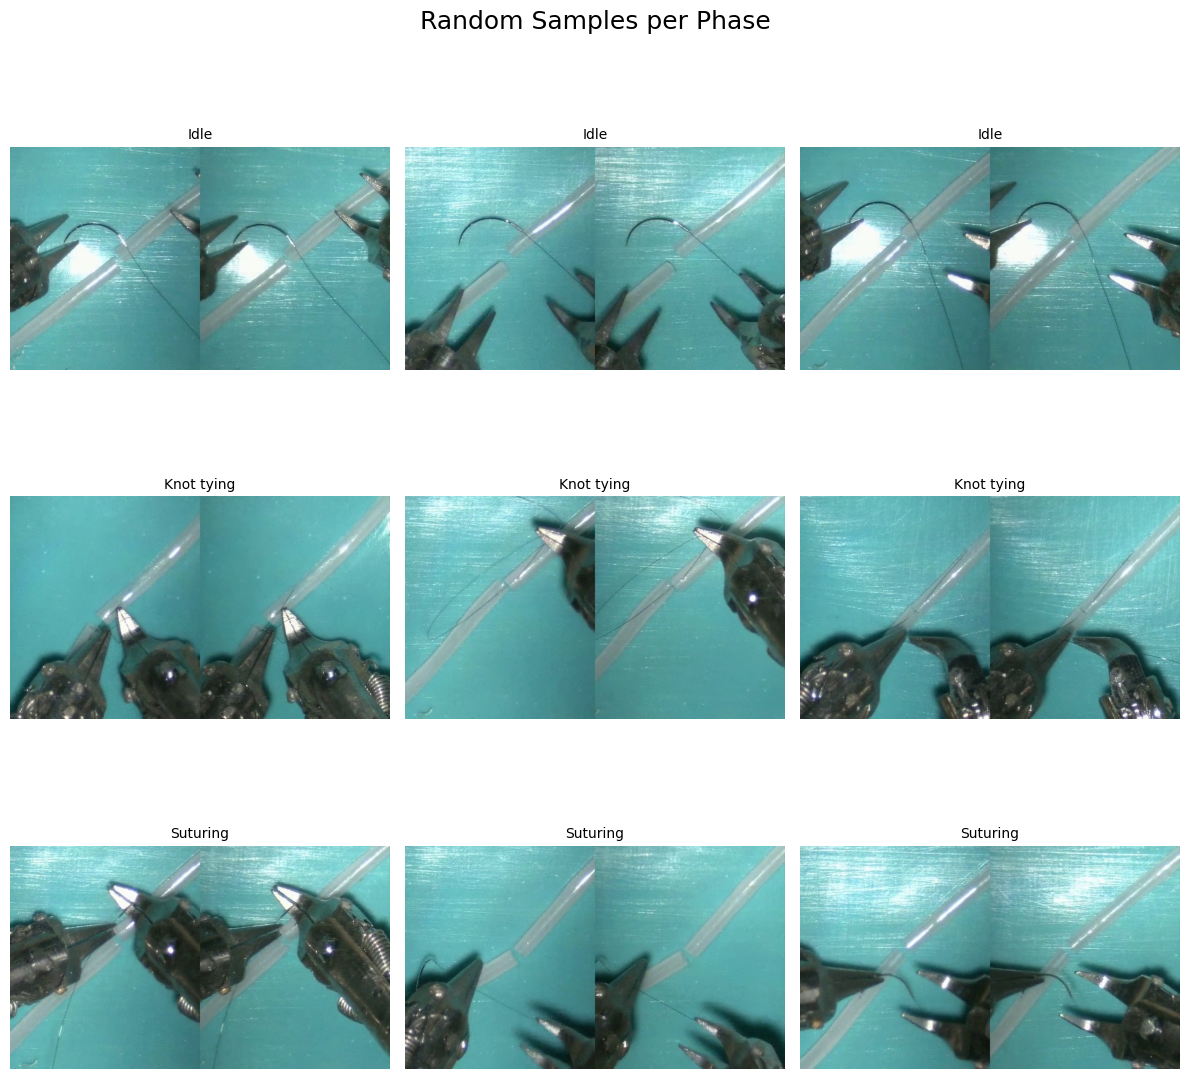

In [6]:
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

# CONFIGURATION

# Number of sample images to display per phase (i.e., class/label)
samples_per_phase = 3

# Create a dictionary to group image paths by their label (phase ID)
# defaultdict(list) automatically creates an empty list for new keys
label_to_paths = defaultdict(list)

# all_data is assumed to be a list of (frame_path, label_id) pairs
# Here we organize all frame paths under their respective label IDs
for path, label_id in all_data:
    label_to_paths[label_id].append(path)

# Determine the number of unique phases (rows in the final plot)
n_rows = len(label_to_paths)

# Number of columns equals the number of samples we want to show per phase
n_cols = samples_per_phase

# Create a grid of subplots (n_rows x n_cols)
# figsize sets the overall size of the figure (in inches)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

# Add a main title above all the subplots
fig.suptitle("Random Samples per Phase", fontsize=18)

# Get all label IDs in sorted order (for consistent row display)
sorted_labels = sorted(label_to_paths.keys())

# Loop over each row (i.e., each unique label/phase)
for row, label_id in enumerate(sorted_labels):
    # Convert label ID back to its readable name using id_to_phase mapping
    label_name = id_to_phase[label_id]

    # Randomly sample a few images from this label
    # Ensure we don't try to sample more images than we actually have
    samples = random.sample(label_to_paths[label_id], min(samples_per_phase, len(label_to_paths[label_id])))

    # For each column (i.e., each sampled image for this label)
    for col in range(samples_per_phase):
        # Access the correct subplot (row x col)
        # If there's only one row, axes may be 1D
        ax = axes[row, col] if n_rows > 1 else axes[col]

        # Only plot if we have enough samples for this column
        if col < len(samples):
            # Open the image file using PIL
            img = Image.open(samples[col])

            # Display the image in the subplot
            ax.imshow(img)

            # Set the subplot title to the phase name
            ax.set_title(f"{label_name}", fontsize=10)

        # Remove axis ticks and labels for a cleaner look
        ax.axis('off')

# Adjust layout to prevent overlaps
plt.tight_layout()

# Adjust top spacing to make room for the main title
plt.subplots_adjust(top=0.95)

# Display the final grid of images
plt.show()

### 📝 TODO: Customize the Annotation Granularity

By default, the code extracts labels from the `"Phase"` column in the annotation files.  
However, you can modify this to use a different level of granularity depending on your task (e.g. `"Verb_Left"`, `"Tool_Right"`, etc.).

**To do:**  
Replace `"Phase"` with the desired column name when reading annotations.

**Where to look:**  
Open any `*_annotation.txt` file inside the folder:  
`MISAW/train/Procedural description/`  
This will show you the available columns you can use for training with different labels.

## 📁 Dataset Formats for Surgical Phase Recognition

In this notebook, we explore **three common dataset formats** used in computer vision and deep learning. All formats are based on the original `MISAW/train/Frames` and `MISAW/train/Procedural description` data, and are designed to support different model architectures and training needs:

### 1. **COCO-style (JSON-based)**  
Stores all annotations in a single `annotations.json` file, where each entry includes the image path, video ID, frame name, and label.  
✅ Great for flexible pipelines, multi-task learning, and custom datasets.

### 2. **ImageNet-style (Folder-based)**  
Organizes frames into folders named after their label (e.g., `Suturing/`, `Idle/`, etc.), as expected by libraries like `torchvision.datasets.ImageFolder`.  
✅ Ideal for standard CNN classification pipelines.

### 3. **CSV-based (Flat Index)**  
Stores all frame paths and labels in a single `annotations.csv` file, which can be loaded with `pandas` for quick filtering, sampling, and data manipulation.  
✅ Best for prototyping and Pandas-based pipelines.

---

Each format comes with TODO sections in the scripts — the idea is for you to:

- 🔧 **Fill in the missing parts** (e.g., replace `"Phase"` with another label like `"Step"`)
- ✅ **Use the validation cells** provided to check if the format is correctly built

Once completed, these formats will allow you to train and evaluate models easily using PyTorch or other frameworks.

### 🗂️ Converting to ImageNet-style Format
Organizes the dataset in a class-wise folder structure suitable for image classification tasks, like this:
```
MISAW_imnet/
  ├── Phase1/
  │     └── video1_frame_0000.jpg
  └── Phase2/
        └── video2_frame_0000.jpg
```

In [7]:
import os           # For directory operations
import glob         # For listing files using patterns
import pandas as pd # For reading annotation files
import shutil       # For copying images

# --- CONFIGURATION ---

resample_rate = 120  # Use the same value you used when extracting frames

# Path to folder containing annotation files (one .txt file per video)
annotation_folder = 'MISAW/train/Procedural decription'

# Path to the folder where extracted frames are stored
frames_folder = 'MISAW/train/Frames'

# Path to the output ImageNet-style dataset
output_root = 'MISAW_imnet'
os.makedirs(output_root, exist_ok=True)  # Create output folder if it doesn't exist

# --- BUILD IMAGE FOLDER STRUCTURE BY PHASE (LABEL) ---

# Loop through all annotation files (e.g., 1_1_annotation.txt, 1_2_annotation.txt, ...)
for anno_file in glob.glob(f'{annotation_folder}/*_annotation.txt'):

    # Extract the video ID (e.g., "1_1" from "1_1_annotation.txt")
    video_id = os.path.basename(anno_file).replace('_annotation.txt', '')

    # Read the annotation file as a DataFrame
    df = pd.read_csv(anno_file, sep='\t')

    # Extract the 'Phase' column and resample it (e.g., every 120th label)
    phases = df['Phase'].tolist()[::resample_rate]

    # Get the corresponding frame image paths (already extracted frames)
    frame_paths = sorted(glob.glob(f"{frames_folder}/{video_id}/*.jpg"))

    # Check that the number of labels matches the number of frames
    if len(phases) != len(frame_paths):
        print(f"⚠️ Skipping {video_id}: mismatched {len(phases)} labels vs {len(frame_paths)} frames")
        continue  # Skip this video if the lengths don't match

    # For each (frame, phase) pair
    for i, (frame_path, phase) in enumerate(zip(frame_paths, phases)):

        # Create the folder for this phase if it doesn't exist
        phase_folder = os.path.join(output_root, phase)
        os.makedirs(phase_folder, exist_ok=True)

        # Create a consistent new filename (e.g., "1_1_frame_0004.jpg")
        new_name = f"{video_id}_frame_{i:04d}.jpg"

        # Copy the frame to the corresponding phase folder
        shutil.copy(frame_path, os.path.join(phase_folder, new_name))

# Final message
print(f"✅ ImageNet-style folders created in {output_root}/")


✅ ImageNet-style folders created in MISAW_imnet/


#### Validation

In [8]:
import os
from collections import defaultdict

# Path to ImageNet root
imnet_root = 'MISAW_imnet'
phases = [d for d in os.listdir(imnet_root) if os.path.isdir(os.path.join(imnet_root, d))]
assert phases, "❌ No class folders found in ImageNet-style structure"

# Collect file counts per phase
phase_counts = defaultdict(int)
total = 0

for phase in phases:
    path = os.path.join(imnet_root, phase)
    files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png'))]
    phase_counts[phase] = len(files)
    total += len(files)

print(f"✅ Found {len(phases)} phases with a total of {total} images")

# Show sample per phase
for phase in sorted(phase_counts.keys())[:3]:
    print(f"🔍 {phase}: {phase_counts[phase]} images")
    sample = os.listdir(os.path.join(imnet_root, phase))[0]
    print(f"   e.g., {sample}")


✅ Found 3 phases with a total of 1079 images
🔍 Idle: 28 images
   e.g., 2_4_frame_0000.jpg
🔍 Knot tying: 659 images
   e.g., 1_2_frame_0037.jpg
🔍 Suturing: 392 images
   e.g., 3_2_frame_0003.jpg


### 📄 Converting to CSV-style Format
Stores the dataset in a flat folder of frames and uses a CSV file to keep track of the mapping between frame paths and their class labels:
```
MISAW_csv/
  ├── Frames/
  │     └── video1_frame_0000.jpg
  └── annotations.csv
```

In [9]:
import os           # For working with directories
import glob         # For listing files with wildcard patterns
import pandas as pd # For reading/writing CSV and annotation files
import shutil       # For copying image files

# --- CONFIGURATION ---

resample_rate = 120  # Must match the rate used when extracting frames

# Folder where annotation .txt files are stored (e.g., "1_1_annotation.txt")
annotation_folder = 'MISAW/train/Procedural decription'

# Folder where extracted frames are stored (per video folder)
frames_folder = 'MISAW/train/Frames'

# Folder where the final CSV-based dataset will be saved
output_root = 'MISAW_csv'

# Subfolder to store all copied frames in a flat format (not per phase or per video)
frames_out_root = os.path.join(output_root, 'Frames')
os.makedirs(frames_out_root, exist_ok=True)  # Create folder if it doesn't exist

# List to store all rows of the CSV (each row = one frame and its label)
rows = []

# --- PROCESS EACH VIDEO ANNOTATION FILE ---

# Loop through all annotation files (one per video)
for anno_file in glob.glob(f'{annotation_folder}/*_annotation.txt'):

    # Extract the video ID from the filename (e.g., "1_1" from "1_1_annotation.txt")
    video_id = os.path.basename(anno_file).replace('_annotation.txt', '')

    # Load the annotation file as a DataFrame
    df = pd.read_csv(anno_file, sep='\t')

    # Get the 'Phase' labels and resample them (e.g., every 120th label)
    phases = df['Phase'].tolist()[::resample_rate]

    # Get corresponding resampled frame paths
    frame_paths = sorted(glob.glob(f"{frames_folder}/{video_id}/*.jpg"))

    # Ensure that the number of frames matches the number of labels
    if len(phases) != len(frame_paths):
        print(f"⚠️ Skipping {video_id}: mismatched {len(phases)} labels vs {len(frame_paths)} frames")
        continue

    # Process each (frame, label) pair
    for i, (frame_path, phase) in enumerate(zip(frame_paths, phases)):

        # Create a consistent new filename (e.g., "1_1_frame_0004.jpg")
        new_frame_name = f"{video_id}_frame_{i:04d}.jpg"

        # Path where this frame will be copied
        new_frame_path = os.path.join(frames_out_root, new_frame_name)

        # Copy the frame to the output folder
        shutil.copy(frame_path, new_frame_path)

        # Create a new row entry for the CSV file
        rows.append({
            "video_id": video_id,
            "frame_name": new_frame_name,
            "path": new_frame_path,
            "label": phase
        })

# --- SAVE THE CSV FILE ---

# Convert the list of rows to a DataFrame
df_out = pd.DataFrame(rows)

# Save the DataFrame as a CSV file
df_out.to_csv(os.path.join(output_root, 'annotations.csv'), index=False)

# Final confirmation message
print(f"✅ CSV-style index saved in {output_root}/annotations.csv")


✅ CSV-style index saved in MISAW_csv/annotations.csv


#### Validation

In [10]:
import os
import pandas as pd

# Path to CSV structure
csv_root = 'MISAW_csv'
csv_file = os.path.join(csv_root, 'annotations.csv')
frames_folder = os.path.join(csv_root, 'Frames')

# Check existence
assert os.path.exists(csv_file), "❌ annotations.csv not found"
assert os.path.isdir(frames_folder), "❌ Frames folder not found"

# Load CSV and validate structure
df = pd.read_csv(csv_file)

# Check column names
expected_cols = {'video_id', 'frame_name', 'path', 'label'}
missing_cols = expected_cols - set(df.columns)
assert not missing_cols, f"❌ Missing columns in CSV: {missing_cols}"

# Check path existence
missing = df[~df['path'].apply(os.path.exists)]

# Print summary
print(f"✅ CSV loaded with {len(df)} rows")
print(f"🔍 Sample row:\n{df.iloc[0]}")
if not missing.empty:
    print(f"⚠️ {len(missing)} listed frames are missing from disk")
else:
    print("✅ All listed frame paths exist")


✅ CSV loaded with 1079 rows
🔍 Sample row:
video_id                                      2_4
frame_name                     2_4_frame_0000.jpg
path          MISAW_csv/Frames/2_4_frame_0000.jpg
label                                        Idle
Name: 0, dtype: object
✅ All listed frame paths exist


### 📁 Converting to COCO-style Format
This section creates a new structure suitable for COCO-style datasets used in deep learning. It includes:
```
MISAW_coco/
  ├── Frames/
  │     └── video1_frame_0000.jpg
  ├── annotations.json
  └── phase_to_id.json
```
This format is helpful for multi-label or object detection tasks.

In [11]:
import os           # For file and directory operations
import glob         # For finding files using wildcard patterns
import pandas as pd # For reading annotation files
import json         # For saving annotations in JSON format
import shutil       # For copying images

# --- CONFIGURATION ---

resample_rate = 120  # Match this with your frame extraction step size

# Folder where annotation .txt files are stored
annotation_folder = 'MISAW/train/Procedural decription'

# Folder where frames are stored (e.g., MISAW/train/Frames/1_1/frame_0000.jpg)
frames_folder = 'MISAW/train/Frames'

# Output root folder for the new COCO-style dataset
output_root = 'MISAW_coco'

# Inside this, all frames will be copied to one flat "Frames" folder
frames_out_root = os.path.join(output_root, 'Frames')
os.makedirs(frames_out_root, exist_ok=True)  # Create the folder if it doesn't exist

# --- STEP 1: COLLECT UNIQUE PHASES FROM ALL ANNOTATIONS ---

# Set to store all phase names (e.g., Idle, Suturing, etc.)
all_phases = set()

# Loop through each annotation file and collect phase names
for anno_file in glob.glob(f'{annotation_folder}/*_annotation.txt'):
    df = pd.read_csv(anno_file, sep='\t')  # Load tab-separated .txt file as a DataFrame
    all_phases.update(df['Phase'].unique())  # Add unique phases to the set

# Create dictionaries to map phases to integer IDs and back
phase_to_id = {p: i for i, p in enumerate(sorted(all_phases))}  # e.g., "Suturing" → 2
id_to_phase = {i: p for p, i in phase_to_id.items()}            # e.g., 2 → "Suturing"

# --- STEP 2: BUILD JSON ENTRIES AND COPY FRAMES ---

entries = []  # This will hold all annotation entries

# Process each video annotation
for anno_file in glob.glob(f'{annotation_folder}/*_annotation.txt'):
    video_id = os.path.basename(anno_file).replace('_annotation.txt', '')  # e.g., "1_1"

    # Read annotation file
    df = pd.read_csv(anno_file, sep='\t')

    # Resample phase labels to match saved frames (e.g., take every 120th label)
    phases = df['Phase'].tolist()[::resample_rate]

    # Get list of resampled frame image paths
    frame_dir = os.path.join(frames_folder, video_id)
    frame_paths = sorted(glob.glob(os.path.join(frame_dir, '*.jpg')))

    # Ensure the number of frames and labels match
    if len(phases) != len(frame_paths):
        print(f"⚠️ Skipping {video_id}: mismatched {len(phases)} labels vs {len(frame_paths)} frames")
        continue

    # Loop over each frame-label pair
    for i, (frame_path, phase) in enumerate(zip(frame_paths, phases)):
        # Create a new frame name (e.g., "1_1_frame_0003.jpg")
        new_frame_name = f"{video_id}_frame_{i:04d}.jpg"

        # Full destination path for the copied frame
        new_frame_path = os.path.join(frames_out_root, new_frame_name)

        # Copy frame to the output folder
        shutil.copy(frame_path, new_frame_path)

        # Add a dictionary entry for this frame in COCO-style format
        entries.append({
            "video": video_id,
            "frame": new_frame_name,
            "path": new_frame_path,
            "label": phase,
            "label_id": phase_to_id[phase]
        })

# --- STEP 3: SAVE TO DISK ---

# Save all frame annotations to a JSON file
with open(os.path.join(output_root, 'annotations.json'), 'w') as f:
    json.dump(entries, f, indent=2)

# Save the phase-to-ID mapping for future use
with open(os.path.join(output_root, 'phase_to_id.json'), 'w') as f:
    json.dump(phase_to_id, f, indent=2)

# Final confirmation
print(f"✅ COCO-style structure created in {output_root}/ with {len(entries)} annotated frames.")

✅ COCO-style structure created in MISAW_coco/ with 1079 annotated frames.


#### Validation

In [12]:
import os
import json

# Path to COCO folder
coco_root = 'MISAW_coco'
json_path = os.path.join(coco_root, 'annotations.json')
frames_folder = os.path.join(coco_root, 'Frames')

# Check paths
assert os.path.exists(json_path), "❌ annotations.json not found"
assert os.path.isdir(frames_folder), "❌ Frames folder not found"

# Load and check content
with open(json_path, 'r') as f:
    annotations = json.load(f)

assert isinstance(annotations, list), "❌ annotations.json should contain a list"
assert 'frame' in annotations[0] and 'label' in annotations[0], "❌ Missing keys in annotation entries"

# Check file existence and print sample
missing = [ann for ann in annotations if not os.path.exists(ann['path'])]
print(f"✅ {len(annotations)} total entries")
print(f"🔍 Sample entry:\n{annotations[0]}")
print(f"✅ Found {len(annotations) - len(missing)} valid frame paths")
if missing:
    print(f"⚠️ {len(missing)} frames listed but not found on disk")


✅ 1079 total entries
🔍 Sample entry:
{'video': '2_4', 'frame': '2_4_frame_0000.jpg', 'path': 'MISAW_coco/Frames/2_4_frame_0000.jpg', 'label': 'Idle', 'label_id': 0}
✅ Found 1079 valid frame paths


In [13]:
from torch.utils.data import Dataset
from PIL import Image

class MISAWDataset(Dataset):
    def __init__(self, annotations, transform=None):
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        item = self.annotations[idx]
        # image in gray scale
        image = Image.open(item['path']).convert('L')
        # get the label id: 0,1,...
        label = item['label_id']

        if self.transform:
            image = self.transform(image)

        return image, label


In [14]:
import json
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

# Load annotations from JSON
with open('MISAW_coco/annotations.json') as f:
    annotations = json.load(f)

# Create dataset object with optional transforms and resize to 224×224
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),         # Ensures image is 1-channel
    transforms.Normalize((0.5,), (0.5,)),  # Adjust if you use RGB images → (0.5, 0.5, 0.5)
    transforms.Resize((128, 128))
])

dataset = MISAWDataset(annotations, transform=transform)

# Split dataset (80% train, 20% val)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_set, val_set = random_split(dataset, [train_len, val_len])

# Define dataloaders
BATCH_SIZE = 8        # Number of samples processed before the model is updated (per iteration)
NUM_WORKERS = 2        # Number of subprocesses to use for data loading (0 means load in main process)
LR = 1e-3              # Learning rate used by the optimizer (how big the update steps are)
EPOCHS = 100             # Number of complete passes through the training dataset

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


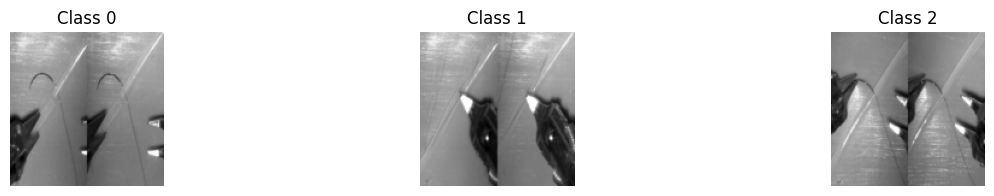

In [15]:
# 🔍 Visualize examples of each digit
classes = list(range(3))
samples_per_class = {c: None for c in classes}

for img, label in dataset:
    if samples_per_class[label] is None:
        samples_per_class[label] = img
    if all(v is not None for v in samples_per_class.values()):
        break

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(samples_per_class[i].squeeze(0), cmap="gray")
    ax.set_title(f"Class {i}")
    ax.axis("off")
plt.show()


In [16]:
# 📦 Install dependencies
!pip install pytorch-lightning -q
!pip install torchmetrics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 38.2 MB/s eta 0:00:00


In [17]:
# 📚 Imports
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import pytorch_lightning as pl
from pytorch_lightning import LightningModule, Trainer
import torchmetrics
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# This class implements a simple Convolutional Neural Network (CNN)
# using the PyTorch Lightning framework, which simplifies training, validation,
# and testing loops by abstracting away boilerplate.

class LitCNN(LightningModule):
    def __init__(self):
        super().__init__()
        self.save_hyperparameters()  # Saves arguments to `hparams` for reproducibility and checkpointing

        # Define the CNN architecture using nn.Sequential for readability.
        # This network is designed for grayscale (1-channel) 28x28 images (e.g., MNIST).
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # → [32, 128, 128]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                           # → [32, 64, 64]

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # → [64, 64, 64]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                           # → [64, 32, 32]

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),# → [128, 32, 32]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                           # → [128, 16, 16]

            nn.Flatten(),                                          # → [128 * 16 * 16] = [32768]
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Linear(256, 3)                                      # 3-class classification
        )

        # Accuracy metric for classification, supports multiclass tasks
        self.accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=3)

    def forward(self, x):
        # Forward pass through the model
        return self.model(x)

    def configure_optimizers(self):
        # Use the Adam optimizer with a learning rate defined externally (LR)
        return torch.optim.Adam(self.parameters(), lr=LR)

    def training_step(self, batch, batch_idx):
        # One training step:
        # - batch contains (x, y): input images and their corresponding labels
        # - Compute predictions and loss
        # - Log the loss and accuracy
        x, y = batch
        y_hat = self(x)                                 # Forward pass
        loss = nn.CrossEntropyLoss()(y_hat, y)          # Compute cross-entropy loss
        acc = self.accuracy(y_hat, y)                   # Compute accuracy
        self.log("train_loss", loss, on_step=False, on_epoch=True)  # Log loss for epoch
        self.log("train_acc", acc, on_step=False, on_epoch=True)    # Log accuracy for epoch
        return loss

    def validation_step(self, batch, batch_idx):
        # Validation step is similar to training, but usually no gradients are computed
        # Metrics are logged for monitoring generalization
        x, y = batch
        y_hat = self(x)
        loss = nn.CrossEntropyLoss()(y_hat, y)
        acc = self.accuracy(y_hat, y)
        self.log("val_loss", loss, on_step=False, on_epoch=True)
        self.log("val_acc", acc, on_step=False, on_epoch=True)

    def test_step(self, batch, batch_idx):
        # Test step is similar to validation, used for final evaluation
        x, y = batch
        y_hat = self(x)
        loss = nn.CrossEntropyLoss()(y_hat, y)
        acc = self.accuracy(y_hat, y)
        self.log("test_loss", loss)
        self.log("test_acc", acc)


In [ ]:
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

# 🚂 Training
model = LitCNN()

# Initialize TensorBoardLogger
logger = TensorBoardLogger("tb_logs", name="resnet_tcn_model")

# Initialize EarlyStopping and ModelCheckpoint callbacks
early_stop_callback = EarlyStopping(
    monitor="val_loss", patience=5, mode="min", verbose=True
)

checkpoint_callback = ModelCheckpoint(
    monitor="val_loss", mode="min", save_top_k=1, verbose=True, dirpath="checkpoints/"
)

trainer = Trainer(max_epochs=EPOCHS,
                  accelerator="auto",
                  devices="auto",
                  log_every_n_steps=1,  # ✅ log at every step
                  logger=logger,  # Log to TensorBoard
                  callbacks=[early_stop_callback, checkpoint_callback]  # Add callbacks here
)
trainer.fit(model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | model    | Sequential         | 8.5 M  | train
1 | accuracy | MulticlassAccuracy | 0      | train
--------------------------------------------------------
8.5 M     Trainable params
0         Non-trainable params
8.5 M     Total params
33.929    Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
